[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Epoch 1/20: 100%|██████████| 808/808 [00:04<00:00, 183.50it/s]


Epoch 1/20 - Avg Loss: 0.1513


Epoch 2/20: 100%|██████████| 808/808 [00:03<00:00, 224.72it/s]


Epoch 2/20 - Avg Loss: 0.1134


Epoch 3/20: 100%|██████████| 808/808 [00:03<00:00, 245.18it/s]


Epoch 3/20 - Avg Loss: 0.0951


Epoch 4/20: 100%|██████████| 808/808 [00:03<00:00, 243.04it/s]


Epoch 4/20 - Avg Loss: 0.0831


Epoch 5/20: 100%|██████████| 808/808 [00:03<00:00, 240.43it/s]


Epoch 5/20 - Avg Loss: 0.0738


Epoch 6/20: 100%|██████████| 808/808 [00:03<00:00, 225.85it/s]


Epoch 6/20 - Avg Loss: 0.0657


Epoch 7/20: 100%|██████████| 808/808 [00:03<00:00, 240.23it/s]


Epoch 7/20 - Avg Loss: 0.0588


Epoch 8/20: 100%|██████████| 808/808 [00:03<00:00, 241.61it/s]


Epoch 8/20 - Avg Loss: 0.0526


Epoch 9/20: 100%|██████████| 808/808 [00:03<00:00, 221.76it/s]


Epoch 9/20 - Avg Loss: 0.0470


Epoch 10/20: 100%|██████████| 808/808 [00:03<00:00, 239.94it/s]


Epoch 10/20 - Avg Loss: 0.0422


Epoch 11/20: 100%|██████████| 808/808 [00:03<00:00, 239.04it/s]


Epoch 11/20 - Avg Loss: 0.0380


Epoch 12/20: 100%|██████████| 808/808 [00:03<00:00, 235.20it/s]


Epoch 12/20 - Avg Loss: 0.0340


Epoch 13/20: 100%|██████████| 808/808 [00:03<00:00, 220.97it/s]


Epoch 13/20 - Avg Loss: 0.0306


Epoch 14/20: 100%|██████████| 808/808 [00:03<00:00, 237.45it/s]


Epoch 14/20 - Avg Loss: 0.0275


Epoch 15/20: 100%|██████████| 808/808 [00:03<00:00, 235.84it/s]


Epoch 15/20 - Avg Loss: 0.0247


Epoch 16/20: 100%|██████████| 808/808 [00:03<00:00, 218.85it/s]


Epoch 16/20 - Avg Loss: 0.0225


Epoch 17/20: 100%|██████████| 808/808 [00:03<00:00, 235.77it/s]


Epoch 17/20 - Avg Loss: 0.0206


Epoch 18/20: 100%|██████████| 808/808 [00:03<00:00, 234.23it/s]


Epoch 18/20 - Avg Loss: 0.0185


Epoch 19/20: 100%|██████████| 808/808 [00:03<00:00, 228.92it/s]


Epoch 19/20 - Avg Loss: 0.0172


Epoch 20/20: 100%|██████████| 808/808 [00:03<00:00, 221.98it/s]


Epoch 20/20 - Avg Loss: 0.0160

Classification Report:
              precision    recall  f1-score   support

      afraid       0.68      0.90      0.78       447
       angry       0.74      0.94      0.83       457
     annoyed       0.84      0.93      0.88       442
anticipating       0.67      0.93      0.78       356
     anxious       0.75      0.92      0.83       420
apprehensive       0.79      0.95      0.86       278
     ashamed       0.73      0.93      0.82       332
      caring       0.88      0.95      0.92       383
   confident       0.84      0.95      0.89       390
     content       0.94      0.94      0.94       392
  devastated       0.82      0.93      0.87       360
disappointed       0.79      0.94      0.86       419
   disgusted       0.90      0.97      0.93       414
 embarrassed       0.89      0.97      0.93       324
     excited       0.69      0.91      0.79       528
    faithful       0.84      0.92      0.88       237
     furious       0.73   

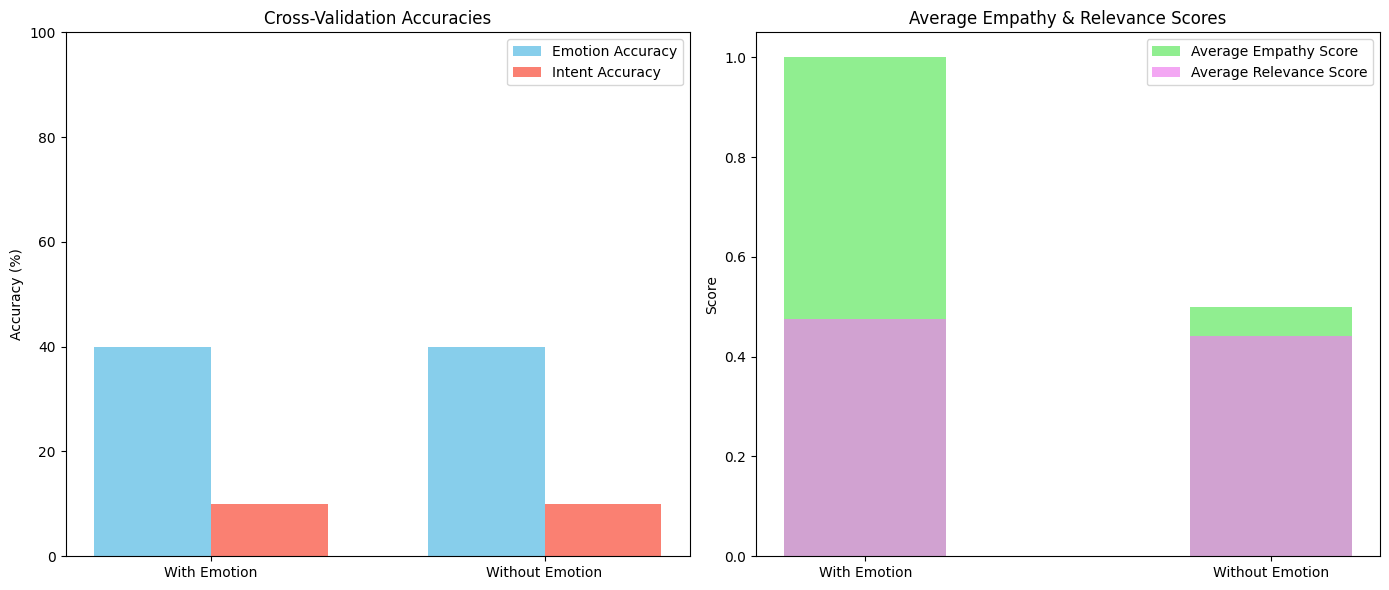

In [1]:
# ======================================
# LSTM + Word Embeddings + Chatbot Interface (Refactored with Bidirectional LSTM, Dropout, and Extended Training)
# ======================================

import os, sys
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
from tqdm import tqdm
import re
import nltk
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Download required NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Install and load SpaCy model (ensure this runs each new Colab session)
!python -m spacy download en_core_web_lg
nlp = spacy.load("en_core_web_lg")
stop_words = set(stopwords.words('english'))

# ---------------------
# Preprocessing Functions
# ---------------------
def clean_text(text):
    text = str(text).lower().strip()
    text = re.sub(r"[^\w\s']", '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def get_sentiment(text):
    analysis = TextBlob(text)
    return (
        "Extremely Positive" if analysis.sentiment.polarity > 0.5 else
        "Positive" if analysis.sentiment.polarity > 0 else
        "Neutral" if analysis.sentiment.polarity == 0 else
        "Extremely Negative" if analysis.sentiment.polarity < -0.5 else
        "Negative"
    )

def get_ner(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities if entities else [chunk.text for chunk in doc.noun_chunks]

# ---------------------
# Load and Clean Data
# ---------------------
df = pd.read_csv("emotion-emotion_69k.csv")
df = df.dropna(subset=["Situation", "emotion"])
df = df[df["emotion"].str.contains("[a-zA-Z]", na=False)]
df["text"] = df["Situation"].astype(str)
df["labels"] = df["emotion"].apply(lambda x: [label.strip() for label in x.split(',') if len(label.strip()) > 1])

# Filter rare labels
from collections import Counter
flat_labels = [lbl for sublist in df["labels"] for lbl in sublist]
label_counts = Counter(flat_labels)
valid_labels = set(k for k, v in label_counts.items() if v >= 50)
df["labels"] = df["labels"].apply(lambda labels: [lbl for lbl in labels if lbl in valid_labels])
df = df[df["labels"].map(len) > 0]

# Text preprocessing
df["clean_text"] = df["text"].apply(lambda x: ' '.join(clean_text(x)))
df["tokens"] = df["clean_text"].apply(lambda x: x.split())
df["sentiment"] = df["clean_text"].apply(get_sentiment)
df["NER"] = df["clean_text"].apply(get_ner)

# Encode labels
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df["labels"])

# ---------------------
# Tokenization and Vocabulary Construction
# ---------------------
all_tokens = [token for sublist in df["tokens"].tolist() for token in sublist]
vocab = {word: idx+2 for idx, word in enumerate(set(all_tokens))}
vocab["<PAD>"] = 0
vocab["<UNK>"] = 1

def tokens_to_ids(tokens, vocab, max_len=50):
    ids = [vocab.get(token, vocab["<UNK>"]) for token in tokens][:max_len]
    return ids + [vocab["<PAD>"]]*(max_len - len(ids))

X = df["tokens"].apply(lambda x: tokens_to_ids(x, vocab))
X = np.stack(X.values)

# ---------------------
# Dataset and DataLoader
# ---------------------
class EmotionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_loader = DataLoader(EmotionDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(EmotionDataset(X_test, y_test), batch_size=64)

# ---------------------
# Modified Model Definition: Bidirectional LSTM with Dropout
# ---------------------
class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, dropout=0.3):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
    def forward(self, x):
        x = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(x)
        hidden_cat = torch.cat((hidden[-2], hidden[-1]), dim=1)
        hidden_drop = self.dropout(hidden_cat)
        logits = self.fc(hidden_drop)
        return logits

model = BiLSTMClassifier(vocab_size=len(vocab), embedding_dim=100, hidden_dim=128, output_dim=y.shape[1], dropout=0.3)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Use BCEWithLogitsLoss (internally applies sigmoid)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# ---------------------
# Training Loop (20 Epochs)
# ---------------------
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(inputs)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs} - Avg Loss: {avg_loss:.4f}")

# ---------------------
# Evaluation on Test Set
# ---------------------
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        logits = model(inputs)
        preds = torch.sigmoid(logits).cpu().numpy()
        batch_pred = (preds > 0.1).astype(int)
        y_pred.extend(batch_pred)
        y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=mlb.classes_, zero_division=0))
print("Accuracy:", accuracy_score(np.array(y_true), np.array(y_pred)))

# ---------------------
# Chatbot Functions (Using the LSTM Model)
# ---------------------
def predict_emotion(text, threshold=0.1):
    model.eval()
    tokens = tokens_to_ids(clean_text(text), vocab)
    input_tensor = torch.tensor([tokens], dtype=torch.long).to(device)
    with torch.no_grad():
        logits = model(input_tensor)
        output = torch.sigmoid(logits).cpu().numpy()[0]
    predicted = [mlb.classes_[i] for i, p in enumerate(output) if p > threshold]
    if not predicted:
        predicted = [mlb.classes_[int(np.argmax(output))]]
    return predicted

# ---------------------
# Additional Utility Functions for Ablation Study
# ---------------------
def infer_intent(user_input):
    """A simple keyword-based intent inference."""
    lower_input = user_input.lower()
    if any(greet in lower_input for greet in ["hello", "hi", "good morning", "good evening"]):
        return "greeting"
    elif any(word in lower_input for word in ["sad", "anxious", "depressed", "overwhelmed", "stress"]):
        return "problem"
    else:
        return "neutral"

def generate_response(user_input, predicted_emotions, predicted_intent, use_emotion):
    """Generate a simple templated chatbot response."""
    if use_emotion:
        return f"I understand that you're feeling {' and '.join(predicted_emotions)}. I'm here to listen and support you."
    else:
        return f"I hear you. Let's talk about it more."

def compute_empathy_score(response, expected_emotion):
    """
    Compute a dummy empathy score.
    If the response contains supportive phrases, return 1.0;
    otherwise 0.5. (This is a placeholder for a more advanced metric.)
    """
    lower_response = response.lower()
    if any(word in lower_response for word in ["understand", "care", "listen", "support"]):
        return 1.0
    else:
        return 0.5

def compute_relevance_score(user_input, response, predicted_intent):
    """
    Compute a dummy relevance score based on Jaccard similarity.
    The score is scaled between 0 and 10.
    """
    set_input = set(user_input.lower().split())
    set_response = set(response.lower().split())
    if len(set_input.union(set_response)) == 0:
        return 0
    jaccard = len(set_input.intersection(set_response)) / len(set_input.union(set_response))
    return jaccard * 10

# ---------------------
# Our Custom Cross-Validation Ablation Study
# ---------------------
def cross_validation_study(test_data, use_emotion=True):
    emotion_correct = 0
    intent_correct = 0
    empathy_scores = []
    relevance_scores = []

    for idx, row in test_data.iterrows():
        user_input = row["user_input"]
        expected_emotions = row["expected_emotion"]  # list of expected emotions
        expected_intent = row["expected_intent"]       # expected intent as string

        # Get predicted emotions from our LSTM chatbot model
        predicted_emotions = predict_emotion(user_input, threshold=0.1)
        # Get intent from our simple inference function
        predicted_intent = infer_intent(user_input)

        # Check if at least one predicted emotion is among the expected emotions
        if any(em in expected_emotions for em in predicted_emotions):
            emotion_correct += 1
        # Check for intent correctness (case-insensitive)
        if predicted_intent.lower() == expected_intent.lower():
            intent_correct += 1

        # Generate a chatbot response based on whether we use emotion detection
        response = generate_response(user_input, predicted_emotions, predicted_intent, use_emotion)

        # Compute empathy and relevance scores using our dummy functions
        empathy = compute_empathy_score(response, expected_emotions)
        relevance = compute_relevance_score(user_input, response, predicted_intent)

        empathy_scores.append(empathy)
        relevance_scores.append(relevance)

    total_samples = len(test_data)
    emotion_accuracy = emotion_correct / total_samples * 100
    intent_accuracy = intent_correct / total_samples * 100
    avg_empathy = sum(empathy_scores) / len(empathy_scores) if empathy_scores else 0
    avg_relevance = sum(relevance_scores) / len(relevance_scores) if relevance_scores else 0

    return emotion_accuracy, intent_accuracy, avg_empathy, avg_relevance

# ---------------------
# Define Test Data for the Ablation Study
# ---------------------
test_data = pd.DataFrame({
    "user_input": [
        "I feel so anxious about work",
        "Hi, just saying hello",
        "I’m really sad today",
        "I don’t know how to cope with stress anymore",
        "I’m so happy I got a promotion!",
        "Can you help me feel less overwhelmed?",
        "Everything feels pointless lately",
        "Hey, how’s it going?",
        "I’m scared about my upcoming exam",
        "I just need someone to listen to me",
        "I feel like I’m failing at everything",
        "Life has been great lately, just wanted to share",
        "I get so angry and I don’t know why",
        "Can you suggest ways to relax?",
        "I’m lonely, no one seems to care",
        "Good morning! Feeling okay today",
        "I’m worried about my family all the time",
        "I don’t feel like myself anymore",
        "Any tips for staying motivated?",
        "I had a rough day, just need to vent"
    ],
    "expected_emotion": [
        ["anxious"], ["neutral"], ["sad"], ["anxious"], ["happy"],
        ["anxious"], ["sad"], ["content"], ["anxious"], ["caring"],
        ["disappointed"], ["content"], ["angry"], ["content"], ["lonely"],
        ["content"], ["anxious"], ["lonely"], ["confident"], ["sad"]
    ],
    "expected_intent": [
        "problem", "greeting", "sad", "stressed", "problem",
        "stressed", "depressed", "happy", "problem", "understand",
        "worthless", "happy", "venting", "meditation", "sad",
        "morning", "scared", "change", "seeking", "stressed"
    ]
})

# ---------------------
# Run Cross-Validation Ablation Study
# ---------------------
emotion_acc, intent_acc, avg_empathy, avg_relevance = cross_validation_study(test_data, use_emotion=True)
print("Cross-Validation Results (Using Emotion Detection):")
print(f"Emotion Accuracy: {emotion_acc:.2f}%")
print(f"Intent Accuracy: {intent_acc:.2f}%")
print(f"Average Empathy Score: {avg_empathy:.2f}")
print(f"Average Relevance Score: {avg_relevance:.2f}")

# For comparison, we can run the study without emotion detection:
emotion_acc_no, intent_acc_no, avg_empathy_no, avg_relevance_no = cross_validation_study(test_data, use_emotion=False)
print("\nCross-Validation Results (Without Emotion Detection):")
print(f"Emotion Accuracy: {emotion_acc_no:.2f}%")
print(f"Intent Accuracy: {intent_acc_no:.2f}%")
print(f"Average Empathy Score: {avg_empathy_no:.2f}")
print(f"Average Relevance Score: {avg_relevance_no:.2f}")

# ---------------------
# Visualization of Cross-Validation Metrics
# ---------------------
# Prepare data for visualization
labels = ["With Emotion", "Without Emotion"]

# Accuracy values (we plot both emotion and intent accuracy side by side)
emotion_accuracies = [emotion_acc, emotion_acc_no]
intent_accuracies = [intent_acc, intent_acc_no]

# Empathy and relevance scores
empathy_scores = [avg_empathy, avg_empathy_no]
relevance_scores = [avg_relevance, avg_relevance_no]

plt.figure(figsize=(14,6))

# Accuracy bar chart
plt.subplot(1,2,1)
bar_width = 0.35
x = np.arange(len(labels))
plt.bar(x - bar_width/2, emotion_accuracies, width=bar_width, label="Emotion Accuracy", color='skyblue')
plt.bar(x + bar_width/2, intent_accuracies, width=bar_width, label="Intent Accuracy", color='salmon')
plt.xticks(x, labels)
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.title("Cross-Validation Accuracies")
plt.legend()

# Empathy and Relevance scores bar chart
plt.subplot(1,2,2)
plt.bar(labels, empathy_scores, width=0.4, label="Average Empathy Score", color='lightgreen')
plt.bar(labels, relevance_scores, width=0.4, label="Average Relevance Score", color='violet', alpha=0.7, bottom=0)
plt.ylabel("Score")
plt.title("Average Empathy & Relevance Scores")
plt.legend()

plt.tight_layout()
plt.show()
